### Desafio:

Você trabalha em uma empresa de telecom e tem clientes de vários serviços diferentes, entre os principais: internet e telefone.

O problema é que, analisando o histórico dos clientes dos últimos anos, você percebeu que a empresa está com Churn (quantidade de clientes que a empresa perdeu) de mais de 26% dos clientes.

Isso representa uma perda de milhões para a empresa.

O que a empresa precisa fazer para resolver isso?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1- Importar e visualizar a base de dados

In [2]:
base = pd.read_csv('telecom_users.csv', sep=',')
base.head()

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN


### 2- Removendo informações irrelevantes 

In [3]:
base = base.drop('Unnamed: 0', axis=1) 

### 3- Tratando os dados -> Valores que estão sendo reconhecidos de forma errada e Valores vazios

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [5]:
# "19" coluna TotalGasto apresenta um valor objeto, mas deveria ser um número | caso haja algum erro errors='coerce' irá deletar esse erro
base['TotalGasto'] = pd.to_numeric(base['TotalGasto'], errors='coerce') 

# deletando colunas vazias 
base = base.dropna(how='all',axis=1) # how -> deletar as colunas com todos os valorez vazios (all) ou pelo menos 1 valor vazio (any)

# deletando linhas vazias
base = base.dropna(how='any',axis=0)

base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5974 non-null   object 
 1   Genero                  5974 non-null   object 
 2   Aposentado              5974 non-null   int64  
 3   Casado                  5974 non-null   object 
 4   Dependentes             5974 non-null   object 
 5   MesesComoCliente        5974 non-null   int64  
 6   ServicoTelefone         5974 non-null   object 
 7   MultiplasLinhas         5974 non-null   object 
 8   ServicoInternet         5974 non-null   object 
 9   ServicoSegurancaOnline  5974 non-null   object 
 10  ServicoBackupOnline     5974 non-null   object 
 11  ProtecaoEquipamento     5974 non-null   object 
 12  ServicoSuporteTecnico   5974 non-null   object 
 13  ServicoStreamingTV      5974 non-null   object 
 14  ServicoFilmes           5974 non-null   objec

### 4- Análise Inicial -> Como estão os cancelamentos?

In [6]:
# Coluna de Churn representa quantos clientes cancelaram (sim) e quantos não cancelaram (não), vamos visualizar essa coluna

display(base['Churn'].value_counts())
display(base['Churn'].value_counts(normalize=True).map("{:.2%}".format)) # normalize = True para ver o % e map para formatar 


Churn
Nao    4387
Sim    1587
Name: count, dtype: int64

Churn
Nao    73.43%
Sim    26.57%
Name: proportion, dtype: object

### 5- Aprofundando na Análise

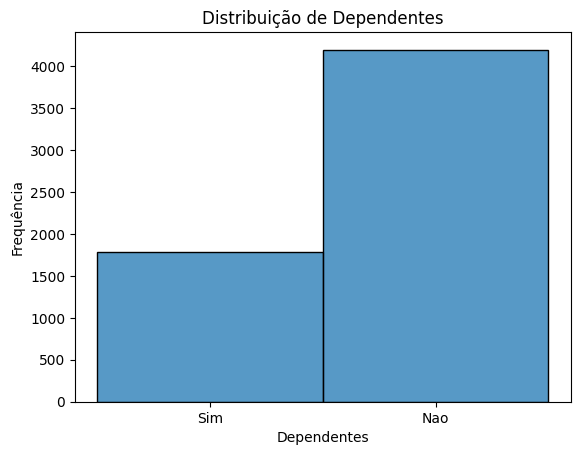

In [7]:
# Comparar cada coluna com a coluna de cancelamento

# 1- Criar gráfico
sns.histplot(base['Dependentes'])
plt.title('Distribuição de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')

# 2- Exibir gráfico
plt.show()


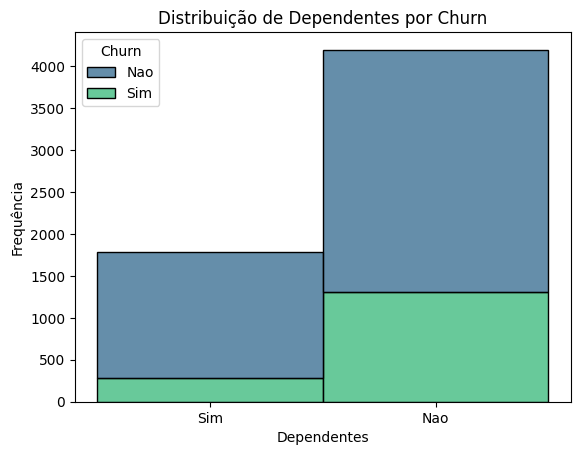

In [8]:
# 1- Criar gráfico com Seaborn
sns.histplot(data=base, x='Dependentes', hue='Churn', multiple='stack', palette='viridis')

# 2- Adicionar títulos e rótulos
plt.title('Distribuição de Dependentes por Churn')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')

# 3- Exibir gráfico
plt.show()


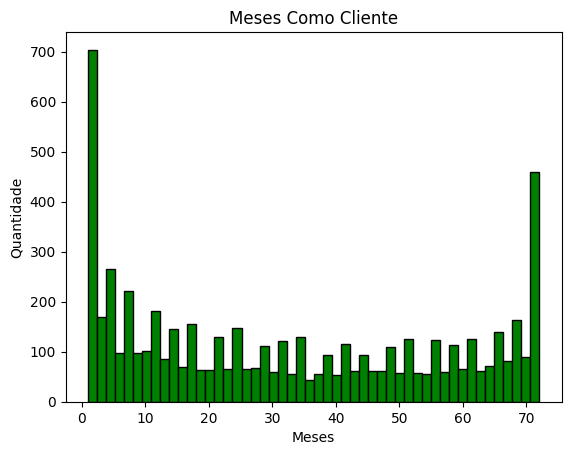

In [10]:
# Criar histograma com Matplotlib
plt.hist(base['MesesComoCliente'], bins=50, color='green', edgecolor='black')
plt.title('Meses Como Cliente')
plt.xlabel('Meses')
plt.ylabel('Quantidade')
plt.show()

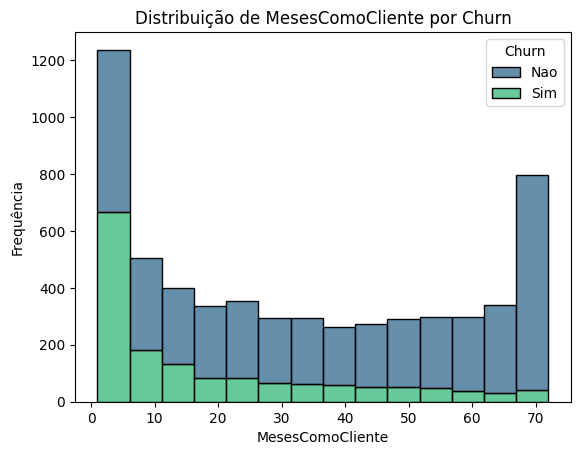

In [ ]:
# 1- Criar gráfico com Seaborn
sns.histplot(data=base, x='MesesComoCliente', hue='Churn', multiple='stack', palette='viridis')

# 2- Adicionar títulos e rótulos
plt.title('Distribuição de MesesComoCliente por Churn')
plt.xlabel('MesesComoCliente')
plt.ylabel('Frequência')

# 3- Exibir gráfico
plt.show()

# Percebe-se alto nível de calcelamento com clientes recentes

C:\Users\isvbl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


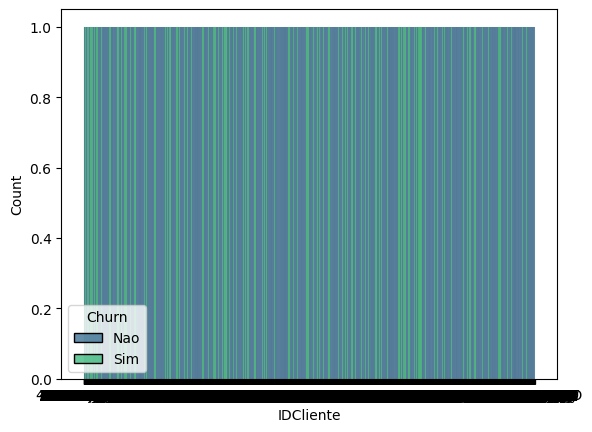

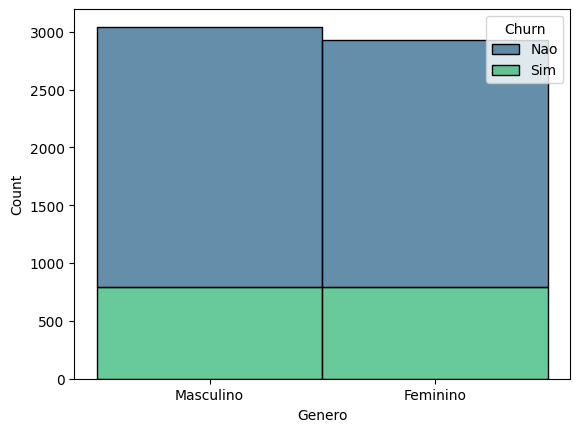

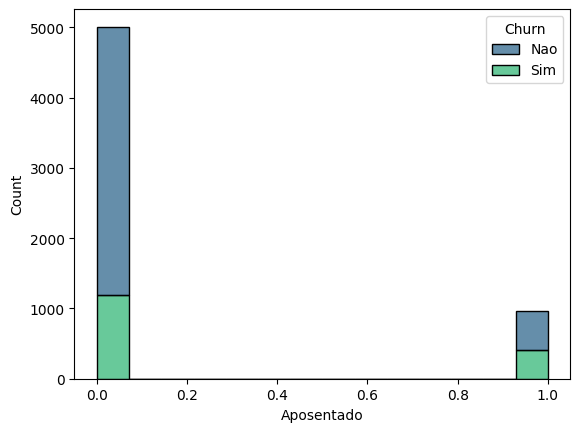

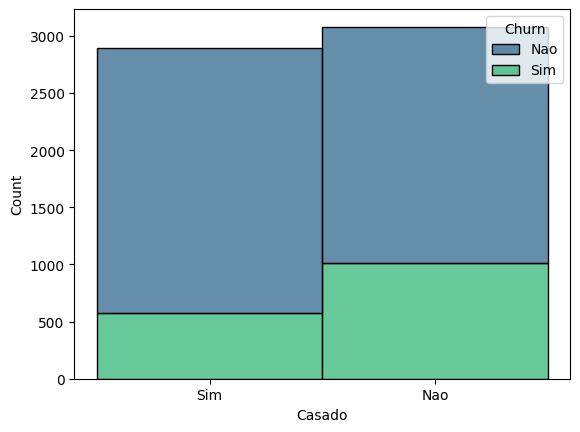

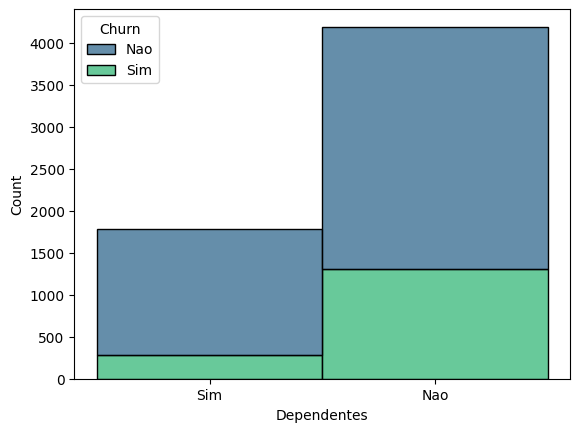

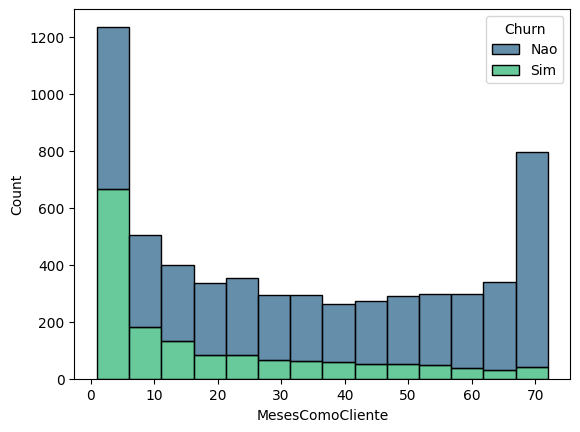

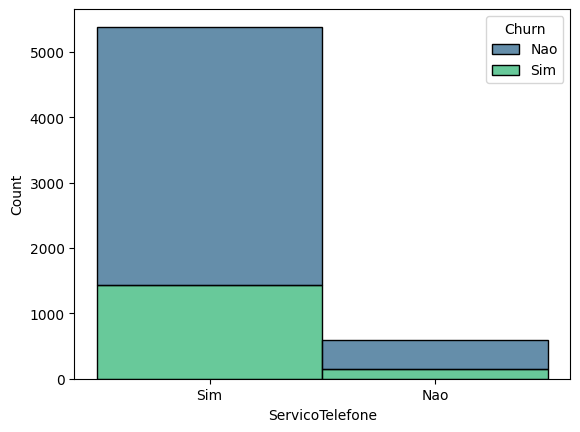

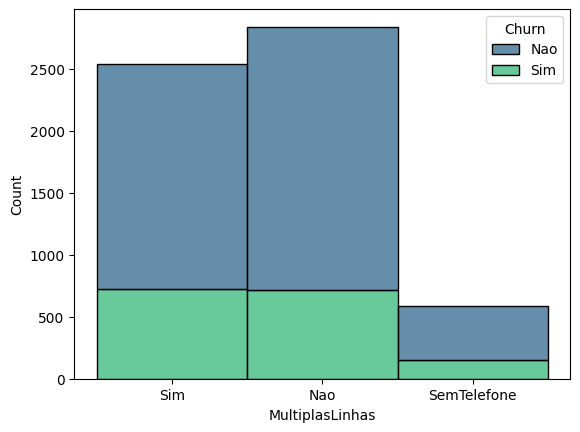

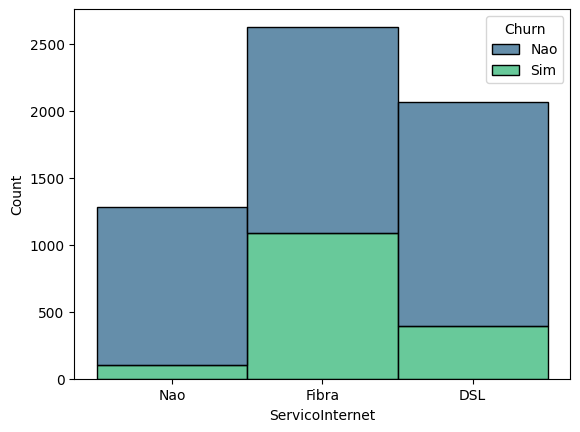

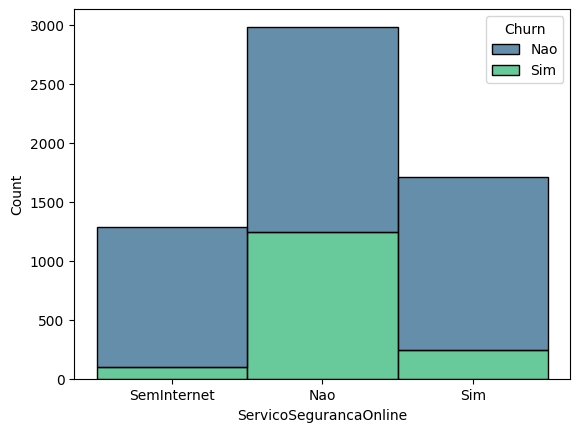

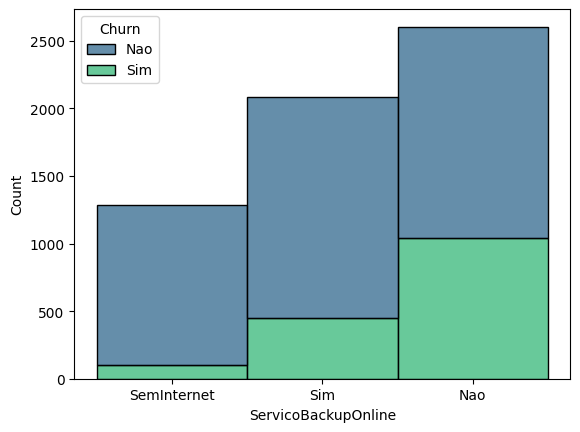

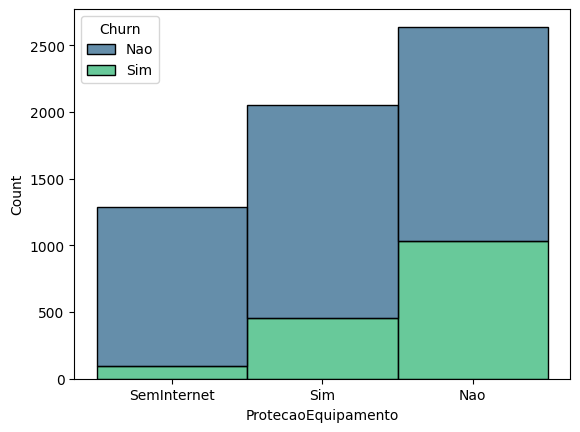

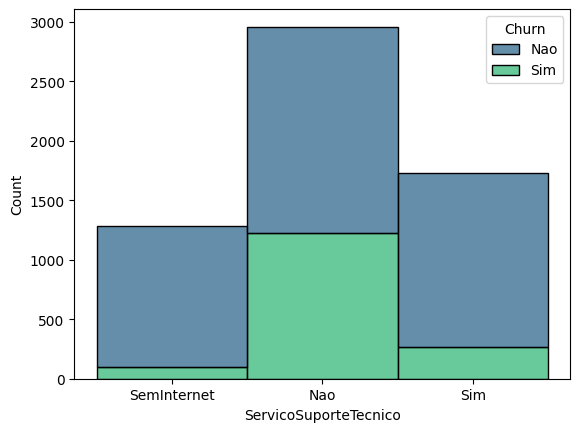

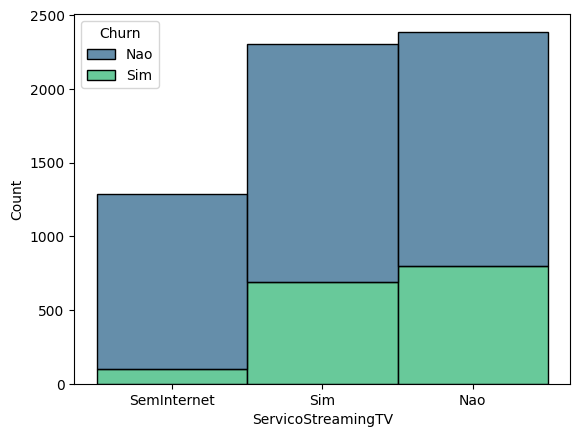

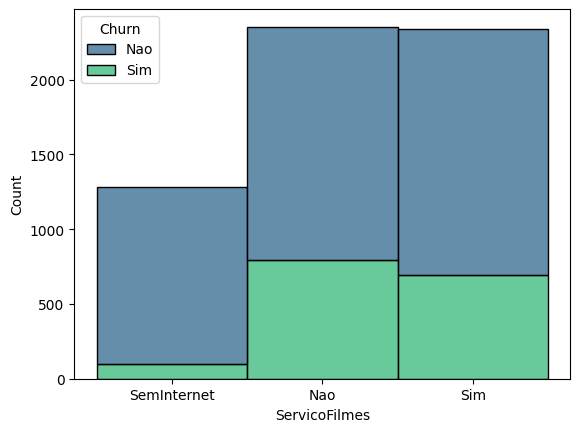

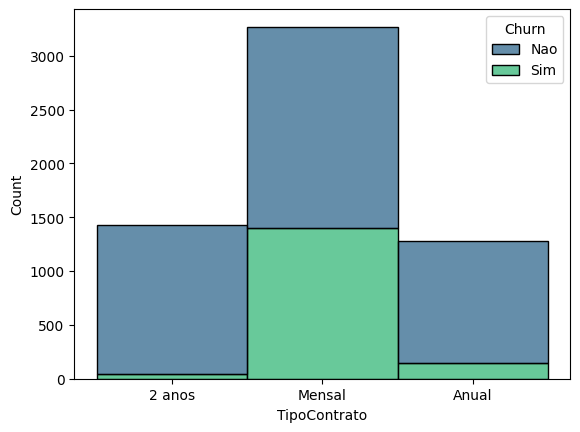

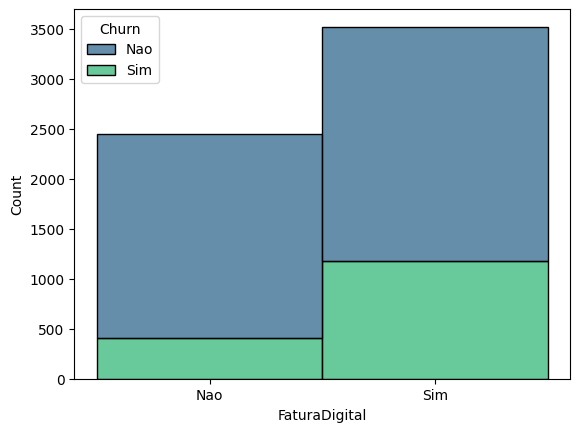

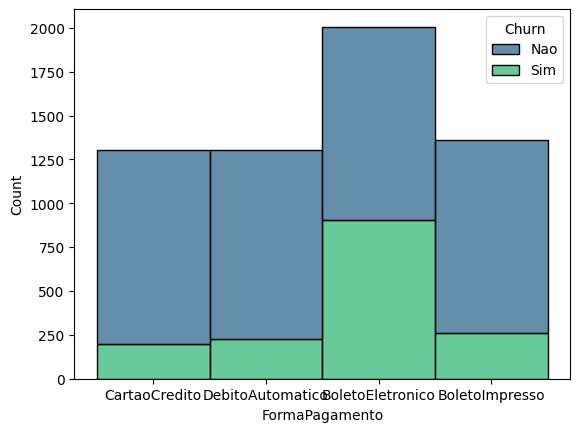

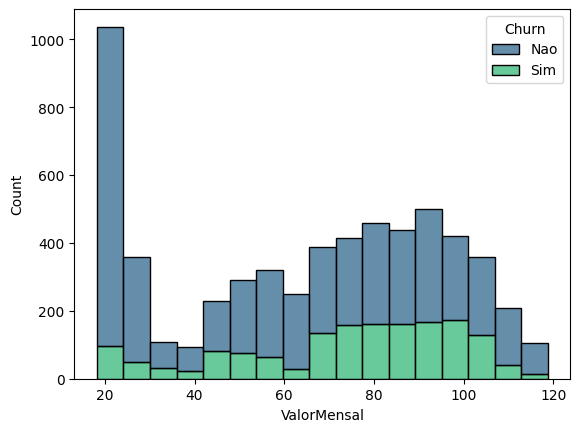

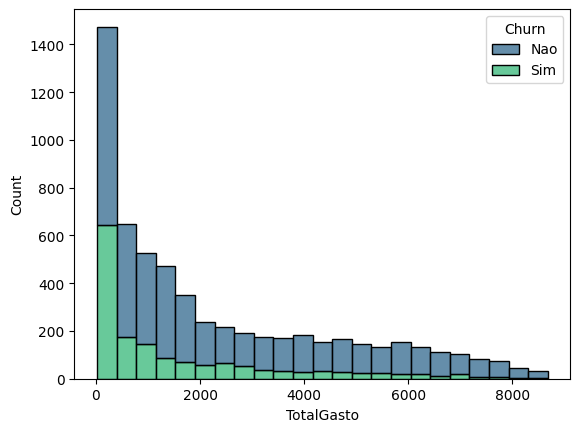

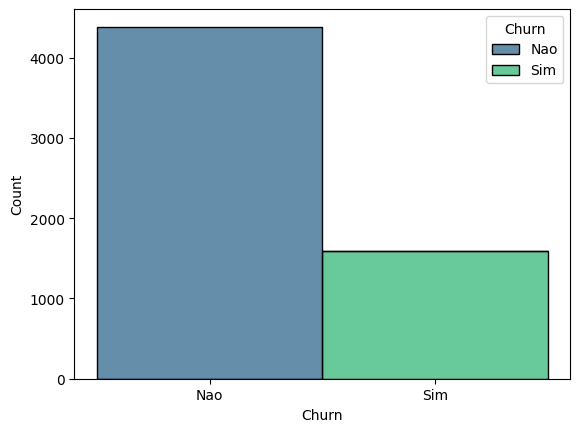

In [15]:
# Elaborando os gráficos de uma forma mais inteligente 
for coluna in base.columns:
    
    sns.histplot(data=base, x=coluna, hue='Churn', multiple='stack', palette='viridis')
    plt.show()

# Seria interessante remover a coluna ID Cliente (base = base.drop('IDCliente', axis=1) ) já que ela não ajudará nessa análise, mas irei manter.  

### Conclusões

- Clientes com contrato mensal tem muito mais chance de cancelar -> Ideal promoções para contratos anuais

- Famílias maiores tendem a cancelar menos do que famílias menores -> Pode-se fazer um 'plano família'

- MesesComoCliente baixos tem muito cancelamento. A primeira experiência do cliente pode ser ruim, captação de clientes desqualificados -> Incentivos iniciais (promoções para maior permanência)

- Clientes com mais serviços, menos chance de cancelamento -> Promoções com mais serviços

- Talvez haja algum problema no serviço 'fibra' que justifique a alta taxa de cancelamento -> Agir sobre a fibra

- Clientes no boleto tem mais chances de cancelar -> Necessária ação para os clientes migrarem para outras formas de pagamento. 